## Créer et visualiser un circuit

### Création

Version intermédiaire

In [23]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(2)
circuit.h(0)
circuit.x(1)
circuit.cx(0, 1)
circuit.measure_all()

Version de fin de vidéo

In [24]:
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.h(1)
circuit.measure_all()

### Visualisation

#### ASCII art

In [25]:
circuit.draw()

┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        ├───┤┌─┴─┐ ░ └╥┘┌─┐
   q_1: ┤ X ├┤ X ├─░──╫─┤M├
        └───┘└───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

#### MatPlotLib

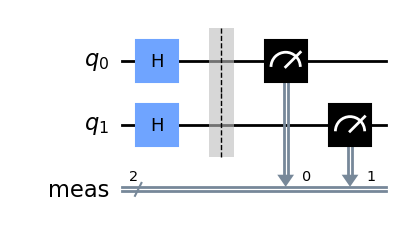

In [26]:
circuit.draw('mpl')

### Simulation

#### Création du simulateur

In [27]:
# Qiskit v0.46.1
#  from qiskit import BasicAer
#  simulator = BasicAer.get_backend('qasm_simulator')

# Qiskit v1.0.2 
from qiskit.providers.basic_provider import BasicProvider

simulator = BasicProvider().get_backend('basic_simulator')

#### Compilation / lancement
Compilation du circuit et lancement de la simulation.

In [28]:
from qiskit import transpile

compiled = transpile(circuit, simulator)
job = simulator.run(compiled, shots = 1024)

#### Résultats

In [29]:
counts = job.result().get_counts(compiled)
counts

{'11': 236, '00': 287, '01': 247, '10': 254}

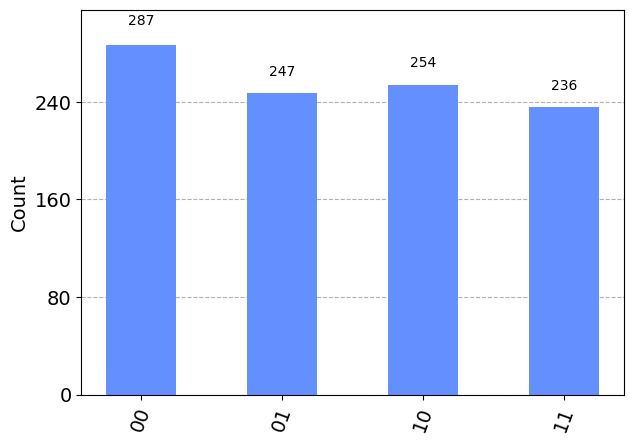

In [30]:
from qiskit.visualization import plot_histogram

plot_histogram(counts)